In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import cv2
import os
from os import listdir
import glob
import matplotlib.pyplot as plt
import seaborn as sns
# tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [2]:
import pathlib

data_dir = pathlib.Path("Resources/images/training")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['flip' 'notflip']


In [3]:
# let's visulaize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
    
    target_folder =target_dir +target_class

  # get a random image path
    random_image =random.sample(os.listdir(target_folder),1)
  # read  in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" +random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}")
    return img

Image shape: (1920, 1080, 3)


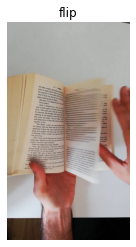

In [4]:
# View a random image from the training dataset
img =view_random_image(target_dir = "Resources/images/training/",
                       target_class = "flip")

Image shape: (1920, 1080, 3)


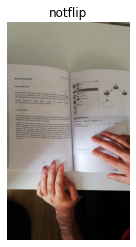

In [5]:
# View a random image from the training dataset
img =view_random_image(target_dir = "Resources/images/training/",
                       target_class = "notflip")

Image shape: (1920, 1080, 3)
Image shape: (1920, 1080, 3)


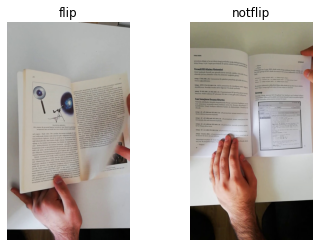

In [6]:
# visualize images
plt.figure()
plt.subplot(1,2,1)
flip_img = view_random_image("Resources/images/training/", "flip")
plt.subplot(1,2,2)
notflip =view_random_image("Resources/images/training/", "notflip")

Image shape: (1920, 1080, 3)
Image shape: (1920, 1080, 3)


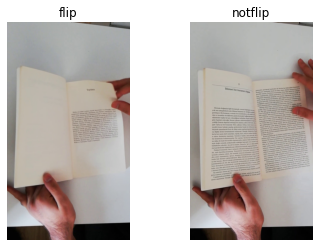

In [7]:
# visualize data
plt.figure()
plt.subplot(1,2,1)
flip_img = view_random_image("Resources/images/testing/", "flip")
plt.subplot(1,2,2)
notflip =view_random_image("Resources/images/testing/", "notflip")

# Model 1

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# preprocess data(get all of the pixel values between 0 & 1 , also called normalization/scaling )
train_datagen  =ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup path to our data directories
train_dir="Resources/images/training"
test_dir = "Resources/images/testing"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               shuffle=False,
                                               batch_size=32,
                                               target_size = (224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               shuffle=False,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# build a CNN model
model_1 = tf.keras.models.Sequential([
                                     tf.keras.layers.Conv2D(filters=10,
                                                            kernel_size=3,
                                                            activation="relu",
                                                            input_shape=(224,224,3)),
                                     tf.keras.layers.Conv2D(10,3,activation="relu"),
                                     tf.keras.layers.MaxPool2D(pool_size=2,
                                                               padding="valid"),
                                     tf.keras.layers.Conv2D(10,3,activation="relu"),
                                     tf.keras.layers.Conv2D(10,3,activation="relu"),
                                     tf.keras.layers.MaxPool2D(2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1, activation="sigmoid")
                                                            
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping()
# fit the model
history_1  = model_1.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data = valid_data,
                         validation_steps=len(valid_data),callbacks=[callback])

Found 2392 images belonging to 2 classes.
Found 597 images belonging to 2 classes.
Epoch 1/5
75/75 [==============================] - 273s 4s/step - loss: 0.7705 - accuracy: 0.5339 - val_loss: 0.6918 - val_accuracy: 0.6013
Epoch 2/5
75/75 [==============================] - 270s 4s/step - loss: 0.6966 - accuracy: 0.5949 - val_loss: 0.6810 - val_accuracy: 0.5142


In [9]:
model_1.predict(valid_data)

19/19 [==============================] - 47s 2s/step


array([[0.56389356],
       [0.56553894],
       [0.56310296],
       [0.55512744],
       [0.555699  ],
       [0.5693436 ],
       [0.56935555],
       [0.5552856 ],
       [0.54965925],
       [0.565593  ],
       [0.56199497],
       [0.5615624 ],
       [0.5499314 ],
       [0.5653072 ],
       [0.57055944],
       [0.56309885],
       [0.5608716 ],
       [0.55068815],
       [0.560067  ],
       [0.56003934],
       [0.55899584],
       [0.5557689 ],
       [0.55244815],
       [0.552187  ],
       [0.55528504],
       [0.5541172 ],
       [0.56156904],
       [0.5675859 ],
       [0.56401676],
       [0.5520595 ],
       [0.56983966],
       [0.5722794 ],
       [0.55902237],
       [0.5543968 ],
       [0.5620467 ],
       [0.5766738 ],
       [0.56882674],
       [0.56717736],
       [0.5679368 ],
       [0.5687379 ],
       [0.56282157],
       [0.5649687 ],
       [0.57640576],
       [0.5678597 ],
       [0.56741136],
       [0.5586526 ],
       [0.55692166],
       [0.548

In [10]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [11]:
model_1.evaluate(valid_data)

19/19 [==============================] - 46s 2s/step - loss: 0.6810 - accuracy: 0.5142


[0.6809539794921875, 0.5142378807067871]

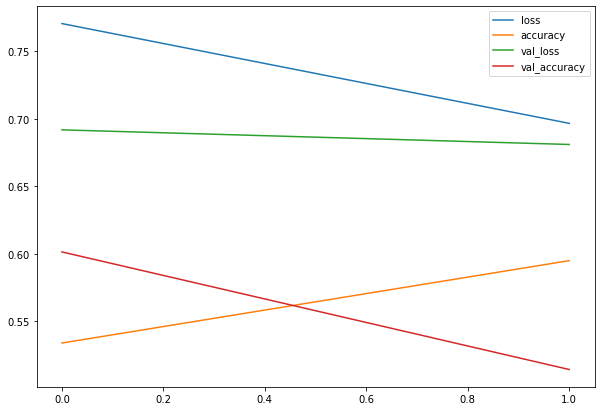

In [12]:

pd.DataFrame(history_1.history).plot(figsize=(10,7));

In [13]:
def plot_loss_curves(history):
    
    """
    Returns separte loss curves for training and validation metrics.
    """
    loss= history.history["loss"]
    val_loss =history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs =range(len(history.history["loss"]))

  # plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title('loss')
    plt.xlabel("epochs")
    plt.legend()

  # plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

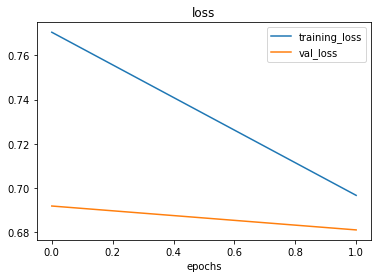

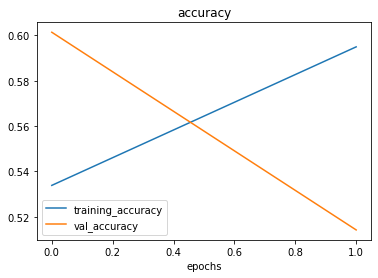

In [14]:
plot_loss_curves(history_1)

In [15]:
y_true = train_data.classes
y_true = y_true == 1
Y_pred = model_1.predict(train_data, steps = len(train_data))
y_pred = (Y_pred > 0.5).T[0]
y_pred_prob = Y_pred.T[0]

75/75 [==============================] - 186s 2s/step


In [16]:
y_true

array([False, False, False, ...,  True,  True,  True])

In [17]:
y_true == 1

array([False, False, False, ...,  True,  True,  True])

In [18]:
y_pred

array([ True,  True,  True, ...,  True,  True,  True])

In [19]:
cm = confusion_matrix(y_true, y_pred)
names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
labels = np.asarray(labels).reshape(2,2)
ticklabels = ['flip', 'notflip']

Text(26.5, 0.5, 'Actual')

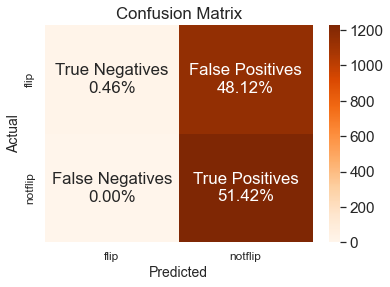

In [20]:
# Create confusion matrix as heatmap
sns.set(font_scale = 1.4)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels )
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Confusion Matrix") #plt.title("Confusion Matrix\n", fontsize=10)
plt.xlabel("Predicted", size=14)
plt.ylabel("Actual", size=14) 

In [21]:
y_true = valid_data.classes
y_true = y_true == 1
Y_pred = model_1.predict(valid_data, steps = len(valid_data))
y_pred = (Y_pred > 0.5).T[0]
y_pred_prob = Y_pred.T[0]

19/19 [==============================] - 47s 2s/step


In [22]:
cm_v = confusion_matrix(y_true, y_pred)
names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
counts = ['{0:0.0f}'.format(value) for value in cm_v.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm_v.flatten()/np.sum(cm_v)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
labels = np.asarray(labels).reshape(2,2)
ticklabels = ['flip', 'notflip']

Text(26.5, 0.5, 'Actual')

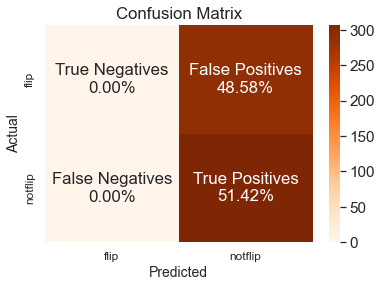

In [23]:
# Create confusion matrix as heatmap
sns.set(font_scale = 1.4)
ax = sns.heatmap(cm_v, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels )
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Confusion Matrix") #plt.title("Confusion Matrix\n", fontsize=10)
plt.xlabel("Predicted", size=14)
plt.ylabel("Actual", size=14) 

In [24]:
accuracy= tf.keras.metrics.Accuracy()
accuracy.update_state(y_true, y_pred)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=597.0>

In [25]:
accuracy.result().numpy()

0.5142379

In [26]:
 ## Summary Statistics
TN, FP, FN, TP = cm_v.ravel() # cm[0,0], cm[0, 1], cm[1, 0], cm[1, 1]
accuracy = (TP + TN) / np.sum(cm_v) # % positive out of all predicted positives
precision = TP / (TP+FP) # % positive out of all predicted positives
recall =  TP / (TP+FN) # % positive out of all supposed to be positives
specificity = TN / (TN+FP) # % negative out of all supposed to be negatives
f1 = 2*precision*recall / (precision + recall)
stats_summary = '[Summary Statistics]\nAccuracy = {:.2%} | Precision = {:.2%} | Recall = {:.2%} | Specificity = {:.2%} | F1 Score = {:.2%}'.format(accuracy, precision, recall, specificity, f1)
print(stats_summary)

[Summary Statistics]
Accuracy = 51.42% | Precision = 51.42% | Recall = 100.00% | Specificity = 0.00% | F1 Score = 67.92%


# Custom Image Testing- Preprocessing

In [27]:
# create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    """
  Reads an image from filename, turns it into  a tensor and reshape it 
  to (img_shape, img_shape, color_Channel)
  """
  # read in the image
    img = tf.io.read_file(filename)
  # Decode the read file into a tensor
    img = tf.image.decode_image(img,channels=3)
  # resize the image
   # X_train = np.array(X_train).reshape(-1,150,150,1)
    img = tf.image.resize(img,(img_shape, img_shape))
  # rescale the image (get all value between 0 and 1)
    img = img/255.
    return img

In [28]:
test_flip = load_and_prep_image("Resources/test1.png")
test_flip

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)>

In [29]:
class_names

array(['flip', 'notflip'], dtype='<U7')

In [30]:
#pred=model_4.predict(tf.expand_dims(test_flip, axis=0))
pred=model_1.predict(tf.expand_dims(test_flip, axis=0))
pred

1/1 [==============================] - 0s 283ms/step


array([[0.5736028]], dtype=float32)

In [31]:
# we can index the predicted class by rounding the prediction probability and indexing it to class names
pred_class =class_names[int(tf.round(pred))]
pred_class

'notflip'

In [32]:
def pred_and_plot(model, filename, class_names=class_names):
    
    
    """
  Imports an image located at filename, makes a prediction with model
  and plot the image with the predicted class as the title.
  """
  # import the target image and preprocess it
    img =load_and_prep_image(filename)

  # make a prediction
    pred= model.predict(tf.expand_dims(img, axis=0))

  # get the predicted class
    pred_class = class_names[int(tf.round(pred))]

  # plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

# Model 1 Testing

1/1 [==============================] - 0s 63ms/step


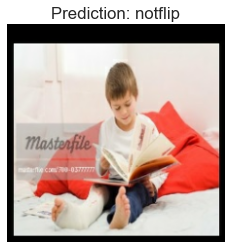

In [33]:
# test our model on a custom image
pred_and_plot(model_1, "Resources/test1.jpg")

1/1 [==============================] - 0s 76ms/step


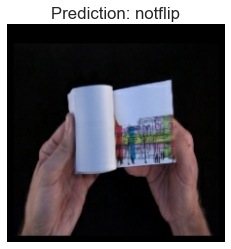

In [34]:
# test our model on a custom image
pred_and_plot(model_1, "Resources/test4.jpg")

1/1 [==============================] - 0s 78ms/step


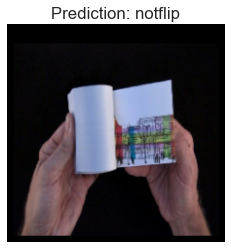

In [35]:
pred_and_plot(model_1, "Resources/test3.png")

1/1 [==============================] - 0s 93ms/step


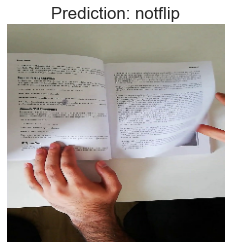

In [36]:
pred_and_plot(model_1, "Resources/flip (1).jpg")

1/1 [==============================] - 0s 98ms/step


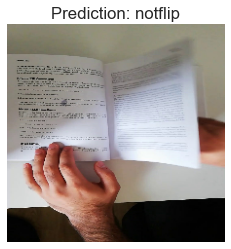

In [37]:
pred_and_plot(model_1, "Resources/flip (2).jpg")

1/1 [==============================] - 0s 71ms/step


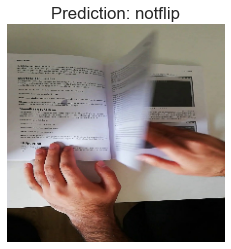

In [38]:
pred_and_plot(model_1, "Resources/flip (3).jpg")

1/1 [==============================] - 0s 79ms/step


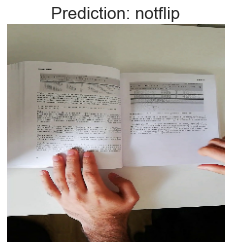

In [39]:
pred_and_plot(model_1, "Resources/notflip (1).jpg")

1/1 [==============================] - 0s 83ms/step


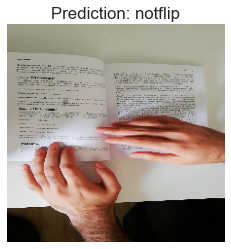

In [40]:
pred_and_plot(model_1, "Resources/notflip (2).jpg")

1/1 [==============================] - 0s 124ms/step


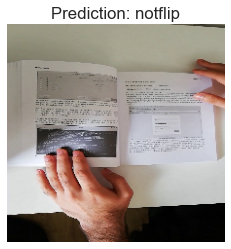

In [41]:
pred_and_plot(model_1, "Resources/notflip (3).jpg")

In [42]:
# save a model
model_1.save("saved_trained_model_1")

INFO:tensorflow:Assets written to: saved_trained_model_1\assets


INFO:tensorflow:Assets written to: saved_trained_model_1\assets


In [43]:
# load in a trained model and evalute it
loaded_model_1= tf.keras.models.load_model("saved_trained_model_1")
loaded_model_1.evaluate(valid_data)

19/19 [==============================] - 47s 2s/step - loss: 0.6810 - accuracy: 0.5142


[0.6809539794921875, 0.5142378807067871]

In [44]:
# compar our loaded model to our existing model
model_1.evaluate(valid_data)

19/19 [==============================] - 47s 2s/step - loss: 0.6810 - accuracy: 0.5142


[0.6809539794921875, 0.5142378807067871]

1/1 [==============================] - 0s 281ms/step


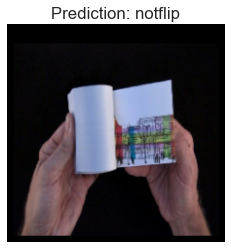

In [45]:
pred_and_plot(loaded_model_1,"Resources/test3.png")

1/1 [==============================] - 0s 79ms/step


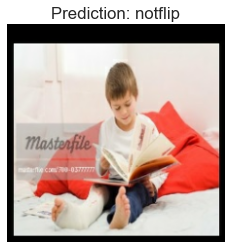

In [46]:
pred_and_plot(loaded_model_1,"Resources/test1.jpg")

# Model 4

In [47]:
from tensorflow.keras.optimizers import Adam
# create the model
model_4 =Sequential([
                   Conv2D(filters=10,
                          kernel_size = (3,3),
                          strides =(1,1),
                          padding ="valid",
                          activation="relu",
                          input_shape = (224,224,3)),  # input layer
                     Conv2D(10,3,activation="relu"),
                     Conv2D(10,3,activation="relu"),
                       Flatten(),
                     Dense(1, activation="sigmoid")    # output layer 
])

# compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


# fit the model
history_4= model_4.fit(train_data,
                       epochs=15,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps = len(valid_data))

Epoch 1/15
75/75 [==============================] - 273s 4s/step - loss: 4.7426 - accuracy: 0.4778 - val_loss: 0.6757 - val_accuracy: 0.6114
Epoch 2/15
75/75 [==============================] - 112s 1s/step - loss: 0.6742 - accuracy: 0.5924 - val_loss: 0.6389 - val_accuracy: 0.6482
Epoch 3/15
75/75 [==============================] - 112s 1s/step - loss: 0.6414 - accuracy: 0.6288 - val_loss: 0.5907 - val_accuracy: 0.6549
Epoch 4/15
75/75 [==============================] - 112s 1s/step - loss: 0.5897 - accuracy: 0.6488 - val_loss: 0.4734 - val_accuracy: 0.8476
Epoch 5/15
75/75 [==============================] - 112s 1s/step - loss: 0.5590 - accuracy: 0.6873 - val_loss: 0.4283 - val_accuracy: 0.8191
Epoch 6/15
75/75 [==============================] - 111s 1s/step - loss: 0.5912 - accuracy: 0.6973 - val_loss: 0.5320 - val_accuracy: 0.7571
Epoch 7/15
75/75 [==============================] - 114s 2s/step - loss: 0.5150 - accuracy: 0.8081 - val_loss: 0.3137 - val_accuracy: 0.8861
Epoch 8/15
75

In [48]:
y_true = valid_data.classes
Y_pred = model_4.predict(valid_data, steps = len(valid_data))
y_pred = (Y_pred > 0.5).T[0]
y_pred_prob = Y_pred.T[0]

19/19 [==============================] - 16s 840ms/step


In [49]:
cm_4 = confusion_matrix(y_true, y_pred)
names = ['True Negatives', 'False# Positives', 'False Negatives', 'True Positives']
counts = ['{0:0.0f}'.format(value) for value in cm_4.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm_4.flatten()/np.sum(cm_4)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
labels = np.asarray(labels).reshape(2,2)
ticklabels = ['flip', 'notflip']

Text(26.5, 0.5, 'Actual')

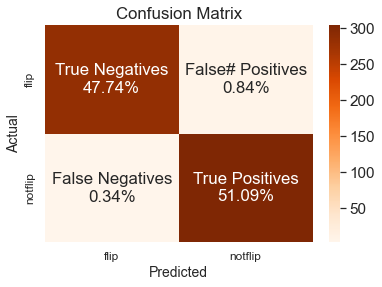

In [50]:
# Create confusion matrix as heatmap
sns.set(font_scale = 1.4)
ax = sns.heatmap(cm_4, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels )
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Confusion Matrix") #plt.title("Confusion Matrix\n", fontsize=10)
plt.xlabel("Predicted", size=14)
plt.ylabel("Actual", size=14) 

In [51]:
 ## Summary Statistics
TN, FP, FN, TP = cm_4.ravel() # cm[0,0], cm[0, 1], cm[1, 0], cm[1, 1]
accuracy = (TP + TN) / np.sum(cm_4) # % positive out of all predicted positives
precision = TP / (TP+FP) # % positive out of all predicted positives
recall =  TP / (TP+FN) # % positive out of all supposed to be positives
specificity = TN / (TN+FP) # % negative out of all supposed to be negatives
f1 = 2*precision*recall / (precision + recall)
stats_summary = '[Summary Statistics]\nAccuracy = {:.2%} | Precision = {:.2%} | Recall = {:.2%} | Specificity = {:.2%} | F1 Score = {:.2%}'.format(accuracy, precision, recall, specificity, f1)
print(stats_summary)

[Summary Statistics]
Accuracy = 98.83% | Precision = 98.39% | Recall = 99.35% | Specificity = 98.28% | F1 Score = 98.87%


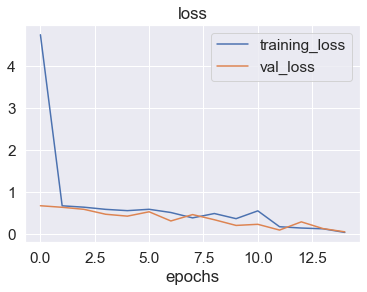

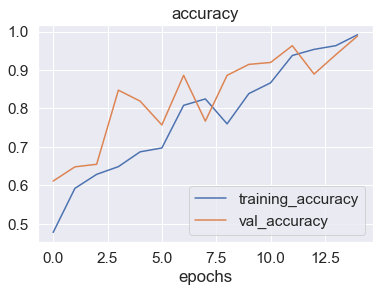

In [52]:
plot_loss_curves(history_4)

# Custom Image Testing- Preprocessing

# Model 4 Testing

1/1 [==============================] - 0s 82ms/step


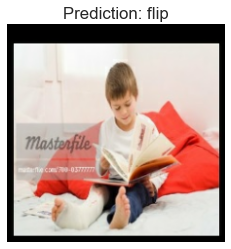

In [53]:
# test our model on a custom image
pred_and_plot(model_4, "Resources/test1.jpg")

1/1 [==============================] - 0s 46ms/step


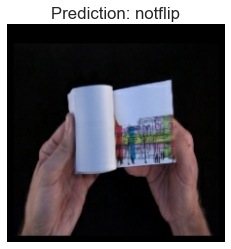

In [54]:
# test our model on a custom image
pred_and_plot(model_4, "Resources/test4.jpg")

1/1 [==============================] - 0s 35ms/step


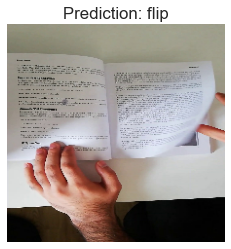

In [55]:
pred_and_plot(model_4, "Resources/flip (1).jpg")

1/1 [==============================] - 0s 31ms/step


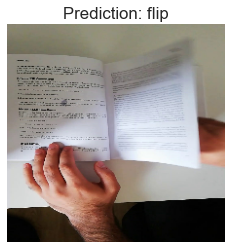

In [56]:
pred_and_plot(model_4, "Resources/flip (2).jpg")

1/1 [==============================] - 0s 31ms/step


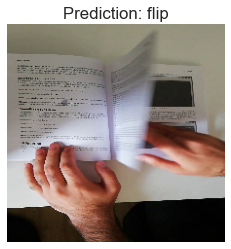

In [57]:
pred_and_plot(model_4, "Resources/flip (3).jpg")

1/1 [==============================] - 0s 47ms/step


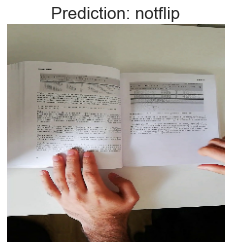

In [58]:
pred_and_plot(model_4, "Resources/notflip (1).jpg")

1/1 [==============================] - 0s 31ms/step


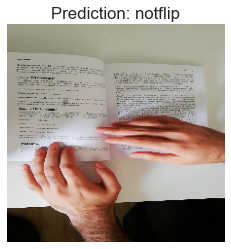

In [59]:
pred_and_plot(model_4, "Resources/notflip (2).jpg")

1/1 [==============================] - 0s 58ms/step


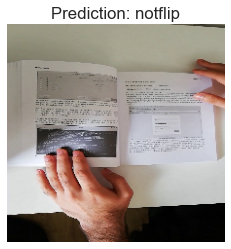

In [60]:
pred_and_plot(model_4, "Resources/notflip (3).jpg")